---
title: "FastLZeroSpikeInference Python Tutorial"
author: "Sean Jewell"
date: '2018-12-07'
output: html_document
layout: default
---

In [1]:
from FastLZeroSpikeInference import fast
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In this tutorial, we demonstrate how the ```FastLZeroSpikeInference``` package can be used to deconvolve calcium imaging data from a single neuron. All demos require the ```FastLZeroSpikeInference``` package; installation instructions are provided [here](software.html). To illustratre the software, we use the following toy dataset.

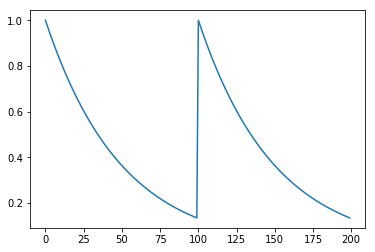

In [2]:
gam = 0.98
y = np.power(gam, np.concatenate([np.arange(100), np.arange(100)]))
plt.plot(y)

The ```estimate_spikes``` function estimates spikes based on the calcium trace, exponential decay parameter $\gamma$, and a tuning parameter $\lambda$. This function solves* 

$$
\underset{c_1,\ldots,c_T, z_2,\ldots,z_T}{\mathrm{minimize}}  
\frac{1}{2} \sum_{t=1}^T \left( y_t -  c_t \right)^2 + \lambda \sum_{t=2}^T 1_{\left( z_t \neq 0 \right) } 
$$

if the ```constraint``` parameter is set to false (default), and 

$$
\underset{c_1,\ldots,c_T, z_2,\ldots,z_T}{\mathrm{minimize}}  
\frac{1}{2} \sum_{t=1}^T \left( y_t -  c_t \right)^2 + \lambda \sum_{t=2}^T 1_{\left( z_t \neq 0 \right) }
\mbox{ subject to } z_t = c_t - \gamma c_{t-1} \geq 0,
$$

if the ```constraint``` parameter is set to true (default). Here's an example of the function applied to the toy data. 

In [3]:
fit = fast.estimate_spikes(y, gam, 1, False)

By default, and to save computation time, the calcium concentration is not automatically estimated. However, the ```estimate_calcium``` function can be used to estimate the calcium concentration based on a prior fit.

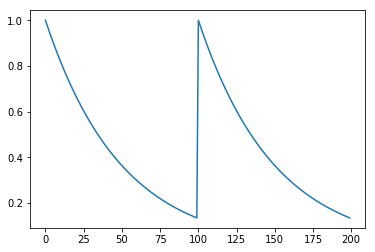

In [4]:
# Determine calcium concentration from fit
fit = fast.estimate_calcium(fit)
plt.plot(fit['estimated_calcium'])

With estimated spike(s)

In [5]:
fit['spikes'][0]

101

Alternatively, both spikes and calcium concentrations can be computed with the ```estimate_spikes``` function with ```estimate_calcium``` parameter set to true. 

In [6]:
fit = fast.estimate_spikes(y, gam, 1, False, True)

To solve the constrained problem 
$$
\underset{c_1,\ldots,c_T, z_2,\ldots,z_T}{\mathrm{minimize}}  
\frac{1}{2} \sum_{t=1}^T \left( y_t -  c_t \right)^2 + \lambda \sum_{t=2}^T 1_{\left( z_t \neq 0 \right) }
\mbox{ subject to } z_t = c_t - \gamma c_{t-1} \geq 0,
$$
we set the ```constraint``` parameter to true in the ```estimate_spikes``` function. Consider the following example.


In [7]:
fit = fast.estimate_spikes(y, gam, 1, True, True)

* In practice, we solve a modification of our algorithm that removes potential numerical instabilities by imposing a minimum calcium concentration constraint. Namely, we require that the calcium concentration never decays below some small $\epsilon>0$, i.e. $c_{t} = \max\{\gamma c_{t-1}, \epsilon\} + z_{t}$. This results in slightly different optimization problems. For small $\epsilon$, the difference between the old and new formulation is negligible (the objective function differ only when, under the old formulation, $c_{t} < \epsilon$, and at such timesteps the difference is bounded by $2y_{t}\epsilon + \frac12 \epsilon^{2}$.) Details are in Appendix S3.1 of the Supplementary Materials of {% cite jewell2018fast %}. 


References 
----

{% bibliography --cited %}